The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class1D
The data folder is: /home/ucecabj/Desktop/MFI_git/MFI_class1D/_data_temp/convergence_analysis/
The MFI grid was: 
xmin= -6.0  xmax= 6.0  nx= 501

The new PLUMED grid is: 
pl_xmin= -7.01  pl_xmax= 7.01  pl_nx= 585


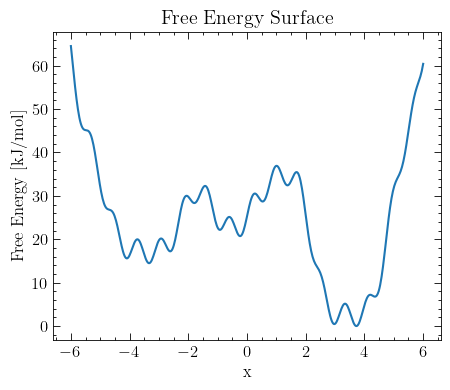

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

# Import the MFI library 
import MFI_lib1D as lib1
import MFI_class1D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

if 'path_data' not in globals():
    if not os.path.isdir("_data_ReInit"): print("\nThe data folder \"_data_ReInit\" does not exist. Creating new folder."); os.mkdir(path_notebook + "/_data_ReInit/"); 
    path_data = path_notebook + "/_data_temp/convergence_analysis/"
print("The data folder is:", path_data)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})


# Load the grid, the FES, and the PLUMED grid. Change n_surf to select the surface.  
for _surf_parameters_ in [0]:
    [grid, y_list, y_string_list] = lib1.load_pkl(path_notebook + "/fes_list_1D")
    FES_cutoff_list = [30, 40, 40, 50, 50, 80, 60, 70, 70, 80, 80, 90, 80, 90, 90, 100, 100, 100, 110, 110]
    n_surf = 4
    y = y_list[n_surf]
    FES_cutoff = FES_cutoff_list[n_surf]
    y_string = y_string_list[n_surf]  
    plumed_dat_text = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x FUNC=({y_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
    dx, dy = grid[1] - grid[0], np.gradient(y, grid[1] - grid[0]) 
    [pl_x, pl_min, pl_max, pl_n, pl_ext] = lib1.get_plumed_grid_1D(grid, -7, 7, print_info=True)
    plt.figure(figsize=(5,4)); plt.plot(grid, y); plt.xlabel("x"); plt.ylabel("Free Energy [kJ/mol]"); plt.title("Free Energy Surface"); plt.show()

#### Define default parameters

In [41]:
os.chdir(path_notebook); reload(MFI_class1D); reload(lib1); pass

In [3]:
default_params = {	"grid":grid, "y":y, "bw":dx*1.5, "periodic":False, "dy":dy, # "initial_position":[0,0], 
					"System":"Langevin", "plumed_dat_text":plumed_dat_text, "pl_grid":pl_x, "simulation_steps": 1_000_000, 
					"position_pace":50, "metad_pace":500, "n_pos_per_window":10, 
     				"metad_width":0.1, "metad_height":5, "biasfactor":50 , 
         			"Bias_sf":1.05, "gaus_filter_sigma":1, 
                    "len_error_list":200, 
					"FES_cutoff":FES_cutoff, "calculate_FES_st_dev":True, "bootstrap_iter":50,
     				"simulation_folder_path": path_data, "print_info": True}

## Run Simulations in the 1st Stage - Exploration Stage

### Run 1st simulation

| 100% | AAD: 2.18 [kJ/mol] | Total time: 0 sec                                                            


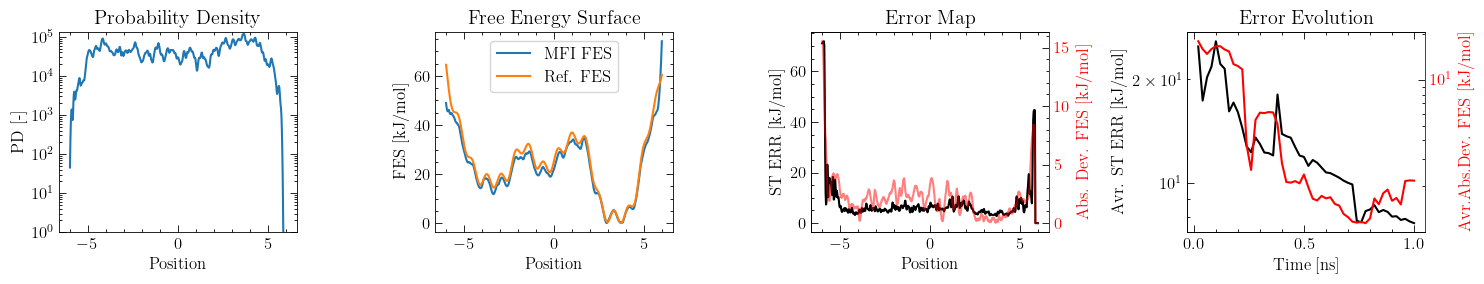

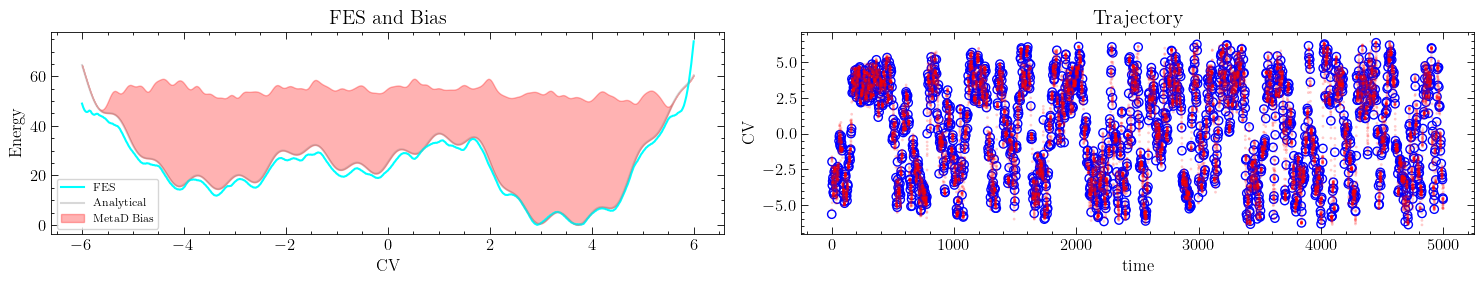

In [50]:
new_params = {**default_params}
new_params.update({"ID":"_1", "metad_height":5, "biasfactor":50})

new_params.update({"len_error_list":50, "calculate_FES_st_dev":False, "bootstrap_iter":None, "n_pos":20_000 // 5})

## Load MFI object
MFI = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI.run_simulation()

## Analyse the data
MFI.analyse_data()

## Plot the results and save the data for later use
MFI.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI.grid, fes=MFI.FES, metad_bias=MFI.Bias, position=MFI.position, hills=MFI.hills, y=MFI.y )
MFI.plot_errors()


| 100% | AAD: 0.419 [kJ/mol] | Total time: 1.0 min : 8 sec                                                            


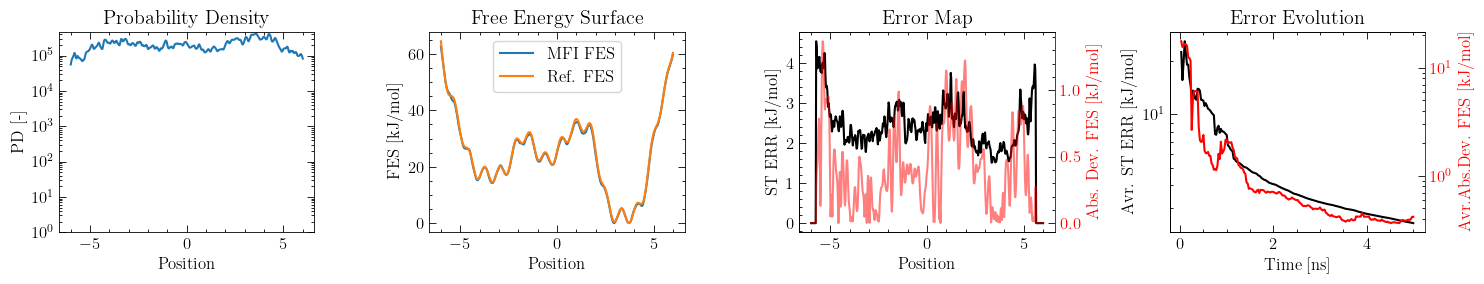

In [59]:
new_params = {**default_params}
new_params.update({"ID":"_1", "metad_height":5, "biasfactor":50})

new_params.update({"len_error_list":200, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 5})

## Load MFI object
MFI = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI.run_simulation()

## Analyse the data
MFI.analyse_data()

## Plot the results and save the data for later use
MFI.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI.grid, fes=MFI.FES, metad_bias=MFI.Bias, position=MFI.position, hills=MFI.hills, y=MFI.y )
MFI.plot_errors()

### Run 2nd simulation

| 100% | AAD: 4.219 [kJ/mol] | Total time: 0 sec                                                            


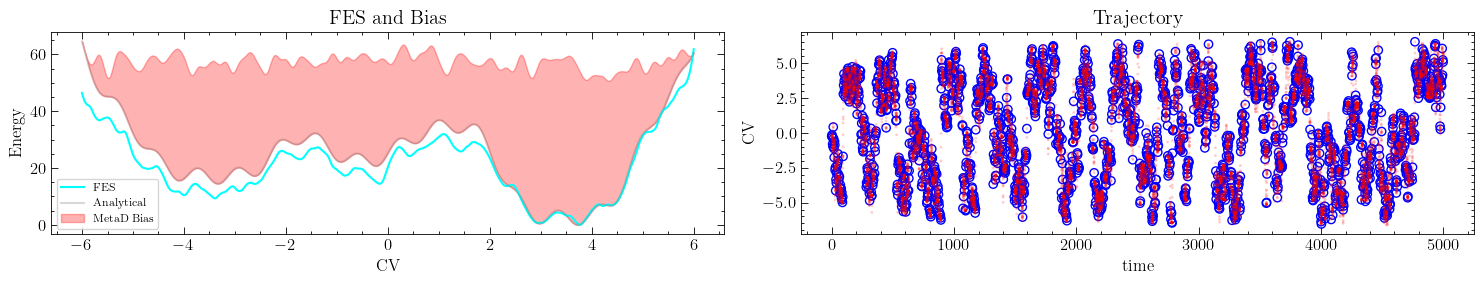

In [53]:
new_params = {**default_params}
new_params.update({"ID":"_2", "metad_height":7, "biasfactor":70})

new_params.update({"len_error_list":50, "calculate_FES_st_dev":False, "bootstrap_iter":None, "n_pos":20_000 // 7})

## Load MFI object
MFI2 = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI2.run_simulation()

## Analyse the data
MFI2.analyse_data()

## Plot the results and save the data for later use
MFI2.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI2.grid, fes=MFI2.FES, metad_bias=MFI2.Bias, position=MFI2.position, hills=MFI2.hills, y=MFI2.y )
MFI2.plot_errors()

In [60]:
new_params = {**default_params}
new_params.update({"ID":"_2", "metad_height":7, "biasfactor":70})

new_params.update({"len_error_list":200, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 7})

## Load MFI object
MFI2 = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI2.run_simulation()

## Analyse the data
MFI2.analyse_data()

## Plot the results and save the data for later use
MFI2.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI2.grid, fes=MFI2.FES, metad_bias=MFI2.Bias, position=MFI2.position, hills=MFI2.hills, y=MFI2.y )
MFI2.plot_errors()

| 100% | AAD: 0.551 [kJ/mol] | Total time: 1.0 min : 9 sec                                                            


### Run 3rd simulation

| 100% | AAD: 3.565 [kJ/mol] | Total time: 0 sec                                                            


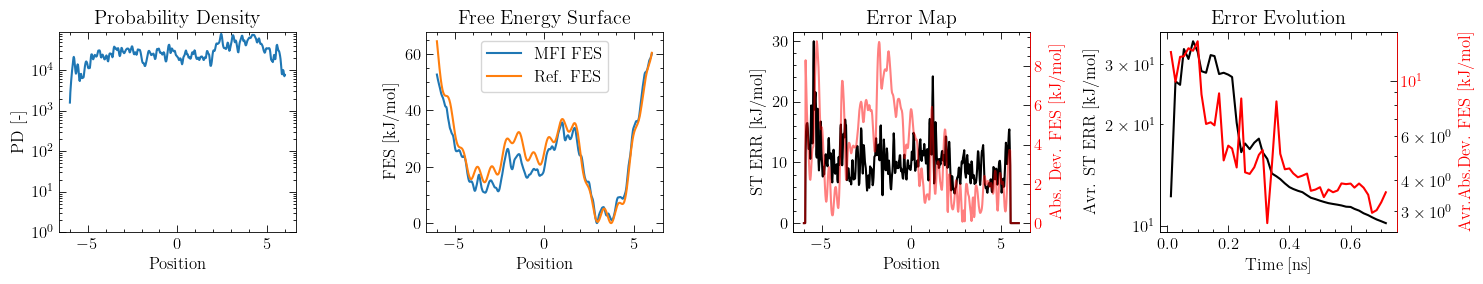

In [58]:
new_params = {**default_params}
new_params.update({"ID":"_3", "metad_height":10, "biasfactor":100})

new_params.update({"len_error_list":50, "calculate_FES_st_dev":False, "bootstrap_iter":None, "n_pos":20_000 // 7})

## Load MFI object
MFI3 = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI3.run_simulation()

## Analyse the data
MFI3.analyse_data()

## Plot the results and save the data for later use
MFI3.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI3.grid, fes=MFI3.FES, metad_bias=MFI3.Bias, position=MFI3.position, hills=MFI3.hills, y=MFI3.y )
MFI3.plot_errors()

| 100% | AAD: 0.498 [kJ/mol] | Total time: 1.0 min : 13 sec                                                            


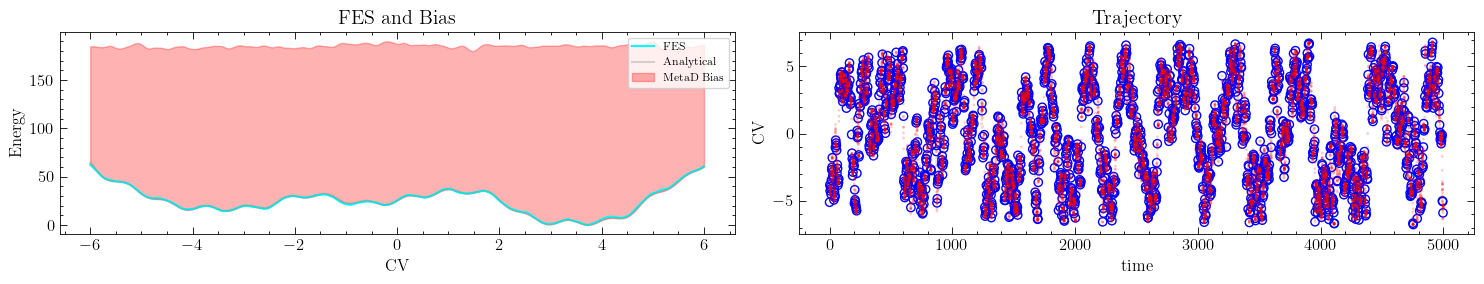

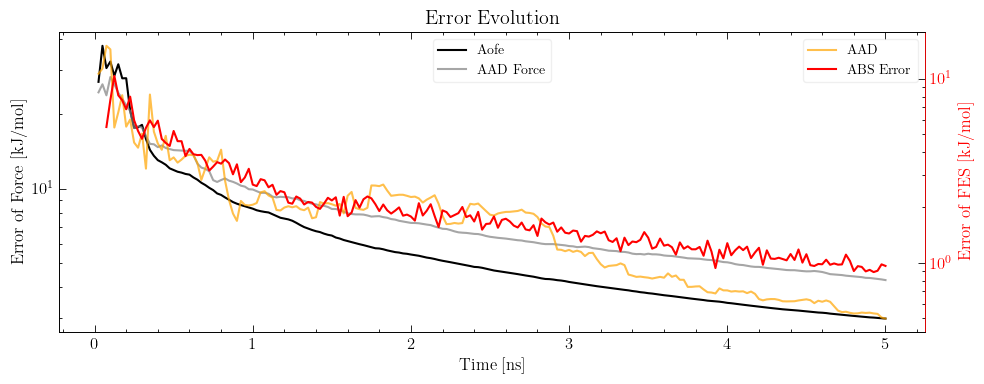

In [61]:
new_params = {**default_params}
new_params.update({"ID":"_3", "metad_height":10, "biasfactor":100})

new_params.update({"len_error_list":200, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 7})

## Load MFI object
MFI3 = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI3.run_simulation()

## Analyse the data
MFI3.analyse_data()

## Plot the results and save the data for later use
MFI3.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI3.grid, fes=MFI3.FES, metad_bias=MFI3.Bias, position=MFI3.position, hills=MFI3.hills, y=MFI3.y )
MFI3.plot_errors()

## Run Simulations in the 2nd Stage - MetaD Stage

In [4]:
new_params = {**default_params}
new_params.update({"ID":"_1", "metad_height":5, "biasfactor":50})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":None, "n_pos":20_000 // 5})

## Load MFI object
MFI_1 = MFI_class1D.MFI1D(**new_params)

## Analyse the data
MFI_1.analyse_data()

MetaD_force_terms = MFI_1.force_terms

# ## Plot the results and save the data for later use
MFI_1.plot_results()
t1, aofe1, aad1 = np.array(MFI_1.Avr_Error_list)[:,0], np.array(MFI_1.Avr_Error_list)[:,2], np.array(MFI_1.Avr_Error_list)[:,MFI_1.aad_index]

| 100% | AAD: 2.18 [kJ/mol] | Total time: 1 sec                                                            


### 1st simulation in MetaD stage

| 100% | AAD: 0.572 [kJ/mol] | Total time: 29 sec                                                            


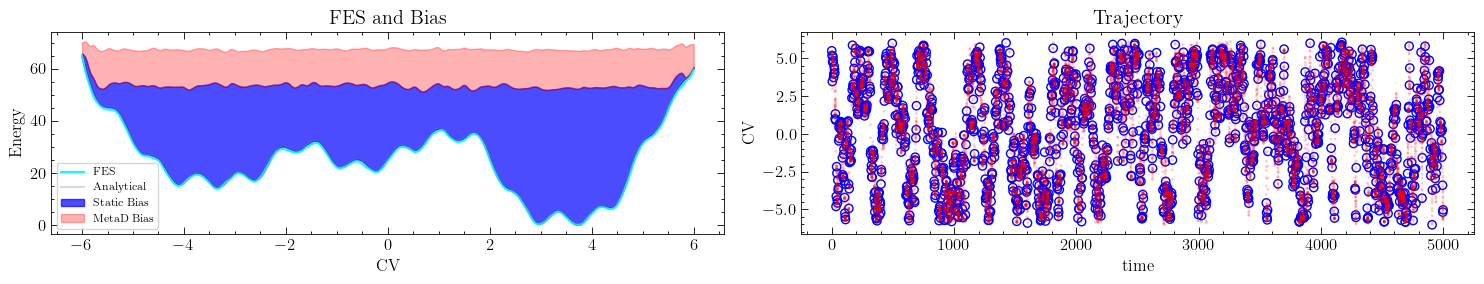

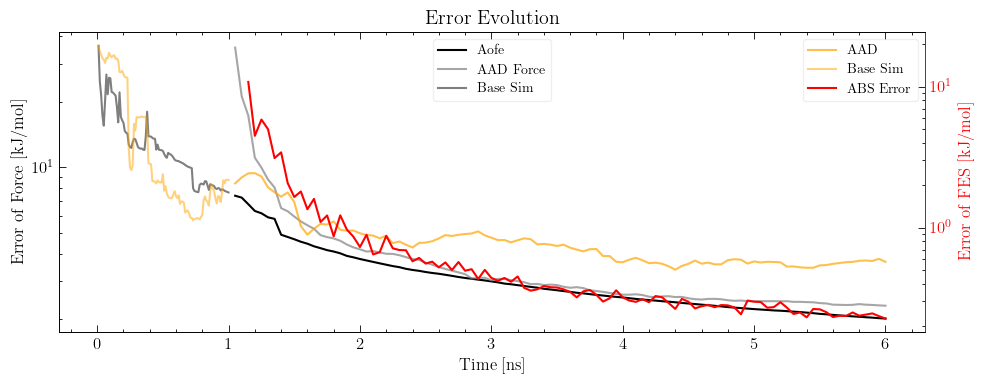

In [15]:
new_params = {**default_params}
new_params.update({"ID":"_2_1", "metad_height":3, "biasfactor":5})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":MFI_1.force_terms, "base_time":MFI_1.sim_time})


## Load MFI object
MFI_2_1 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_2_1.make_external_bias(MFI_1.FES)

## Run the simulation
# MFI_2_1.run_simulation()

## Analyse the data
MFI_2_1.analyse_data()

## Plot the results and save the data for later use
MFI_2_1.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])
lib1.plot_FES_Bias_and_Traj(grid=MFI_2_1.grid, fes=MFI_2_1.FES, metad_bias=MFI_2_1.Bias, static_bias=MFI_2_1.Bias_static, position=MFI_2_1.position, hills=MFI_2_1.hills, y=MFI_2_1.y )
MFI_2_1.plot_errors(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])

t2, aofe2, aad2 = np.array(MFI_2_1.Avr_Error_list)[:,0], np.array(MFI_2_1.Avr_Error_list)[:,2], np.array(MFI_2_1.Avr_Error_list)[:,MFI_2_1.aad_index]


### 2nd simulation in MetaD stage

| 100% | AAD: 0.448 [kJ/mol] | Total time: 1.0 min : 12 sec                                                            


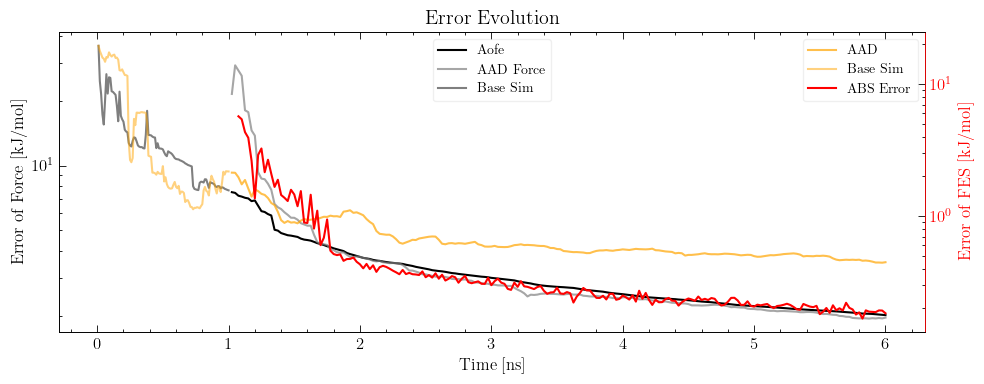

In [11]:
new_params = {**default_params}
new_params.update({"ID":"_2_2", "metad_height":1, "biasfactor":3})
new_params.update({"len_error_list":200, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":MFI_1.force_terms, "base_time":MFI_1.sim_time})


## Load MFI object
MFI_2_2 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_2_2.make_external_bias(MFI_1.FES)

## Run the simulation
# MFI_2_2.run_simulation()

## Analyse the data
MFI_2_2.analyse_data()

## Plot the results and save the data for later use
MFI_2_2.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])
lib1.plot_FES_Bias_and_Traj(grid=MFI_2_2.grid, fes=MFI_2_2.FES, metad_bias=MFI_2_2.Bias, static_bias=MFI_2_2.Bias_static, position=MFI_2_2.position, hills=MFI_2_2.hills, y=MFI_2_2.y )
MFI_2_2.plot_errors(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])


### 3rd simulation in MetaD stage

In [14]:
new_params = {**default_params}
new_params.update({"ID":"_2_3", "metad_height":1, "biasfactor":3})
new_params.update({"len_error_list":200, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":MFI_1.force_terms, "base_time":MFI_1.sim_time})

## Load MFI object
MFI_2_3 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_2_3.make_external_bias(MFI_1.FES)

## Run the simulation
# MFI_2_3.run_simulation()

## Analyse the data
MFI_2_3.analyse_data()

## Plot the results and save the data for later use
MFI_2_3.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])
lib1.plot_FES_Bias_and_Traj(grid=MFI_2_3.grid, fes=MFI_2_3.FES, metad_bias=MFI_2_3.Bias, static_bias=MFI_2_3.Bias_static, position=MFI_2_3.position, hills=MFI_2_3.hills, y=MFI_2_3.y )
MFI_2_3.plot_errors(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])


| 100% | AAD: 0.328 [kJ/mol] | Total time: 1.0 min : 13 sec                                                            


## Run Simulations in the 3rd Stage - Flat Stage

### 1st simulation in Flat stage

| 100% | AAD: 0.258 [kJ/mol] | Total time: 30 sec                                                            


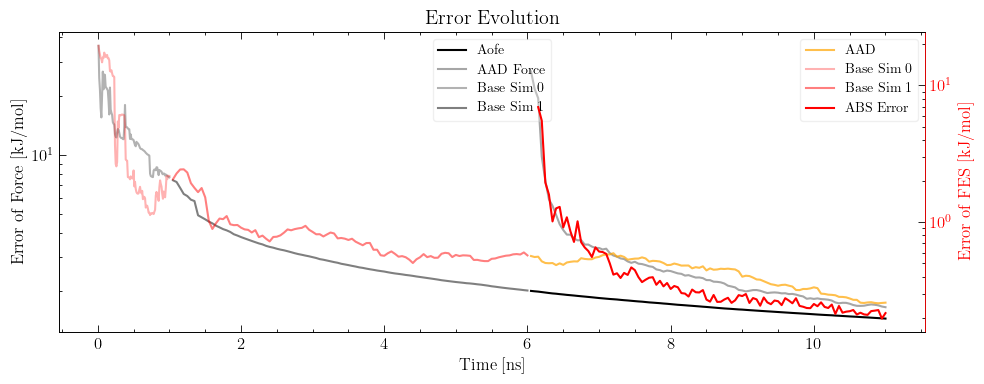

In [17]:
new_params = {**default_params}
new_params.update({"ID":"_3_1", "metad_height":2, "biasfactor":3})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":lib1.patch_forces([MFI_1.force_terms, MFI_2_1.force_terms]), "base_time":MFI_1.sim_time + MFI_2_1.sim_time})


## Load MFI object
MFI_3_1 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_3_1.make_external_bias(MFI_2_1.FES)

## Run the simulation
# MFI_3_1.run_simulation()

## Analyse the data
MFI_3_1.analyse_data()

## Plot the results and save the data for later use
MFI_3_1.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
lib1.plot_FES_Bias_and_Traj(grid=MFI_3_1.grid, fes=MFI_3_1.FES, metad_bias=MFI_3_1.Bias, static_bias=MFI_3_1.Bias_static, position=MFI_3_1.position, hills=MFI_3_1.hills, y=MFI_3_1.y )
MFI_3_1.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])


### 2nd simulation in Flat stage

Simulation started with Terminal input: plumed pesmd < input >/dev/null 2>&1

Running Langevin dynamics: n_steps=1,000,000, ipos=-4.584, Pos_t=50, T=1, t_Tot=5.00ns
sigma=0.1, h=1, bf=3, Gaus_t=500
Static bias used: external_bias.dat 

| 100% | Simulated time: 5.0003ns | Total time: 12 sec | Finished at 00:33:44                                                         

Langevin simulation finished in 12 sec.
| 100% | AAD: 0.352 [kJ/mol] | Total time: 31 sec                                                            


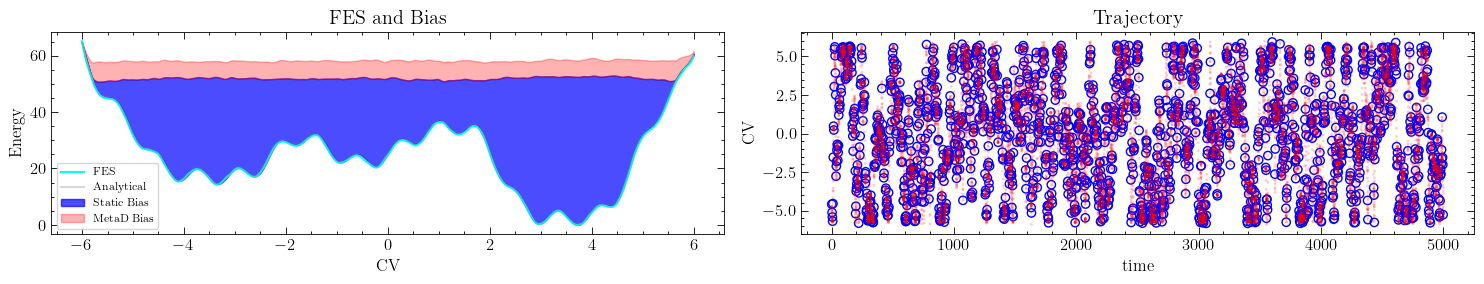

In [18]:
new_params = {**default_params}
new_params.update({"ID":"_3_2", "metad_height":1, "biasfactor":3})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":lib1.patch_forces([MFI_1.force_terms, MFI_2_1.force_terms]), "base_time":MFI_1.sim_time + MFI_2_1.sim_time})


## Load MFI object
MFI_3_2 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_3_2.make_external_bias(MFI_2_1.FES)

## Run the simulation
# MFI_3_2.run_simulation()

## Analyse the data
MFI_3_2.analyse_data()

## Plot the results and save the data for later use
MFI_3_2.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
lib1.plot_FES_Bias_and_Traj(grid=MFI_3_2.grid, fes=MFI_3_2.FES, metad_bias=MFI_3_2.Bias, static_bias=MFI_3_2.Bias_static, position=MFI_3_2.position, hills=MFI_3_2.hills, y=MFI_3_2.y )
MFI_3_2.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])


### 3rd simulation in Flat stage

Simulation started with Terminal input: plumed pesmd < input >/dev/null 2>&1

Running Langevin dynamics: n_steps=1,000,000, ipos=-4.62, Pos_t=50, T=1, t_Tot=5.00ns
sigma=0.1, h=0.5, bf=2, Gaus_t=500
Static bias used: external_bias.dat 

| 100% | Simulated time: 5.0003ns | Total time: 12 sec | Finished at 00:35:04                                                         

Langevin simulation finished in 12 sec.
| 100% | AAD: 0.329 [kJ/mol] | Total time: 30 sec                                                            


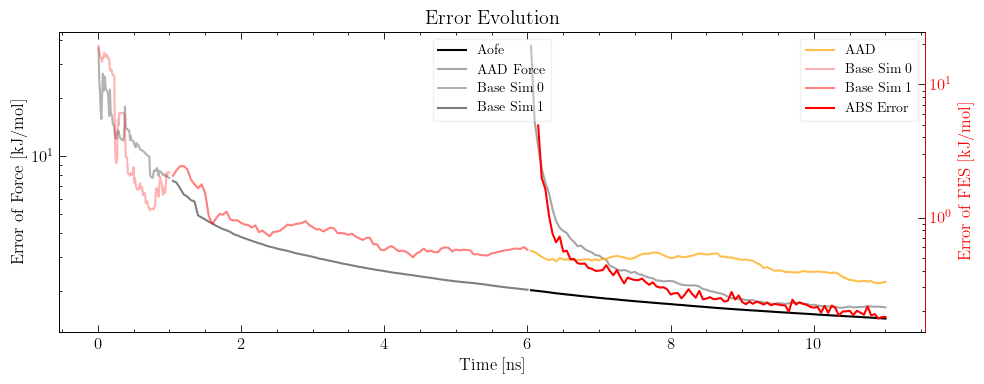

In [19]:
new_params = {**default_params}
new_params.update({"ID":"_3_3", "metad_height":0.5, "biasfactor":2})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":lib1.patch_forces([MFI_1.force_terms, MFI_2_1.force_terms]), "base_time":MFI_1.sim_time + MFI_2_1.sim_time})


## Load MFI object
MFI_3_3 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_3_3.make_external_bias(MFI_2_1.FES)

## Run the simulation
# MFI_3_3.run_simulation()

## Analyse the data
MFI_3_3.analyse_data()

## Plot the results and save the data for later use
MFI_3_3.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
lib1.plot_FES_Bias_and_Traj(grid=MFI_3_3.grid, fes=MFI_3_3.FES, metad_bias=MFI_3_3.Bias, static_bias=MFI_3_3.Bias_static, position=MFI_3_3.position, hills=MFI_3_3.hills, y=MFI_3_3.y )
MFI_3_3.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
